In [2]:
%load_ext autoreload

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats

In [21]:
SFARI_TFs = pd.read_csv("../data/SFARI_TFs_with_ENST_nulls_dropped.csv")
SFARI_TFs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
0,0,0,0,9,ADNP,Activity-dependent neuroprotector homeobox,ENSG00000101126,20,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,41.50,64,sp|Q9H2P0|ADNP_HUMAN,MFQLPVNNLGSLRKARKTVKKILSDIGLEYCKEHIEDFKQFEPNDF...,Q9H2P0,ENST00000349014.8
1,1,1,1,9,AHDC1,AT-hook DNA binding motif containing 1,ENSG00000126705,1,"Rare Single Gene Mutation, Syndromic",1.0,1,14.25,24,sp|Q5TGY3|AHDC1_HUMAN,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,Q5TGY3,ENST00000247087.10
2,2,2,2,9,ARID2,AT-rich interaction domain 2,ENSG00000189079,12,"Rare Single Gene Mutation, Syndromic",2.0,1,NaN,12,sp|Q68CP9|ARID2_HUMAN,MANSTGKAPPDERRKGLAFLDELRQFHHSRGSPFKKIPAVGGKELD...,Q68CP9-1,ENST00000334344.11
3,3,3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2-1,ENST00000303329.9
4,4,4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,ENST00000379044.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,122,122,122,9,ZNF711,zinc finger protein 711,ENSG00000147180,X,Rare Single Gene Mutation,2.0,0,NaN,5,sp|Q9Y462|ZN711_HUMAN,MDSGGGSLGLHTPDSRMAHTMIMQDFVAGMAGTAHIDGDHIVVSVP...,Q9Y462-1,ENST00000276123.7
119,123,123,123,9,ZNF713,Zinc finger protein 713,ENSG00000178665,7,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q8N859|ZN713_HUMAN,MEEEEMNDGSQMVRSQESLTFQDVAVDFTREEWDQLYPAQKNLYRD...,Q8N859,ENST00000429591.4
120,124,124,124,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4,sp|Q6NX45|ZN774_HUMAN,MWLGTSGKSGLPGHCLENPLQECHPAQLEEWALKGISRPSVISQPE...,Q6NX45,ENST00000354377.8
121,125,125,125,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16,sp|Q7Z570|Z804A_HUMAN,MECYYIVISSTHLSNGHFRNIKGVFRGPLSKNGNKTLDYAEKENTI...,Q7Z570,ENST00000302277.7


In [22]:
SFARI_TFs_mapping_keys = SFARI_TFs["uniprotID"].str.split("-").str[0]
SFARI_TFs_mapping_vals = SFARI_TFs["uniprotID"]
uniprot_mapping = dict(zip(SFARI_TFs_mapping_keys, SFARI_TFs_mapping_vals))

In [24]:
SFARI_TF_known_ADs = pd.read_csv("../../output/SFARI_TF_known_ADs.csv", index_col = 0)
SFARI_TF_known_ADs

,Gene,Start,End,uniprotID,Reference,ProteinRegionSeq
33,MEIS2,340,477,O14770,"activation_regions.txt, GSL",DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...
80,KLF7,2,101,O75840,Stanford,DVLASYSIFQELQLVHDTGYFSALPSLEETWQQTCLELERYLQTEP...
83,CAMTA2,472,581,O94983,Stanford,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...
84,CAMTA2,285,468,O94983,"PMID: 16678093, Soto / Stanford",KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...
87,NKX2-2,220,273,O95096,"PMID: 10944215, Soto",AQDLAAATFQAGIPFSAYSAQSLQHMQYNAQYSSASTPQYPTAHPL...
...,...,...,...,...,...,...
688,KDM5B,1302,1391,Q9UGL1,Stanford,NKVSQPPGTTSFSLPDDWDNRTSYLHSPFSTGRSCIPLHGVSPEVN...
689,TCF20,1,327,Q9UGU0,"PMID: 10995766, Soto",MQSFREQSSYHGNQQSYPQEVHGSSRLEEFSPRQAQMFQNFGGTGG...
702,MYT1L,152,425,Q9UL68,"Stanford / Stanford / PMID: 29291346, Soto / S...",EEEEEEEEEEEEEEEENEDHQMNCHNTRIMQDTEKDDNNNDEYDNY...
724,TBX22,402,481,Q9Y458,Stanford,SLAPLMMEVPMLSSLGVTNSKSGSSEDSSDQYLQAPNSTNQMLYGL...


In [28]:
SFARI_TF_known_ADs = SFARI_TF_known_ADs.replace({"uniprotID": uniprot_mapping})

In [29]:
SFARI_TFs_with_known_ADs = SFARI_TFs[SFARI_TFs["uniprotID"].isin(SFARI_TF_known_ADs["uniprotID"])]
SFARI_TFs_with_known_ADs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
3,3,3,3,9,ARNT2,aryl-hydrocarbon receptor nuclear translocator 2,ENSG00000172379,15,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,15,sp|Q9HBZ2|ARNT2_HUMAN,MATPAAVNPPEMASDIPGSVTLPVAPMAATGQVRMAGAMPARGGKR...,Q9HBZ2-1,ENST00000303329.9
4,4,4,4,9,ARX,aristaless related homeobox,ENSG00000004848,X,"Rare Single Gene Mutation, Syndromic",1.0,1,13.80,24,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,Q96QS3,ENST00000379044.5
5,5,5,5,9,AR,androgen receptor,NaN,X,Genetic Association,2.0,0,NaN,6,sp|P10275|ANDR_HUMAN,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,P10275-1,ENST00000374690.9
9,9,9,9,9,CASZ1,castor zinc finger 1,ENSG00000130940,1,Rare Single Gene Mutation,1.0,0,9.55,6,sp|Q86V15|CASZ1_HUMAN,MDLGTAEGTRCTDPPAGKPAMAPKRKGGLKLNAICAKLSRQVVVEK...,Q86V15-1,ENST00000377022.8
10,10,10,10,9,CC2D1A,Coiled-coil and C2 domain containing 1A,ENSG00000132024,19,"Rare Single Gene Mutation, Functional",2.0,0,NaN,15,sp|Q6P1N0|C2D1A_HUMAN,MHKRKGPPGPPGRGAAAARQLGLLVDLSPDGLMIPEDGANDEELEA...,Q6P1N0-1,ENST00000318003.11
11,11,11,11,9,CAMTA2,calmodulin binding transcription activator 2,ENSG00000108509,17,"Rare Single Gene Mutation, Syndromic",1.0,0,NaN,3,sp|O94983|CMTA2_HUMAN,MNTKDTTEVAENSHHLKIFLPKKLLECLPRCPLLPPERLRWNTNEE...,O94983-1,ENST00000348066.8
20,21,21,21,9,EBF3,early B-cell factor 3,ENSG00000108001,10,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,9.75,18,sp|Q9H4W6|COE3_HUMAN,MFGIQENIPRGGTTMKEEPLGSGMNPVRSWMHTAGVVDANTAAQSG...,Q9H4W6-1,ENST00000355311.10
21,22,22,22,9,EGR3,early growth response 3,ENSG00000179388,8,Rare Single Gene Mutation,2.0,0,NaN,3,sp|Q06889|EGR3_HUMAN,MTGKLAEKLPVTMSSLLNQLPDNLYPEEIPSALNLFSGSSDSVVHY...,Q06889-1,ENST00000317216.3
23,24,24,24,9,ESR2,estrogen receptor 2 (ER beta),ENSG00000140009,14,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,9,sp|Q92731|ESR2_HUMAN,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,Q92731-1,ENST00000341099.6
28,30,30,30,9,GLIS1,GLIS family zinc finger 1,ENSG00000174332,1,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,3,sp|Q8NBF1|GLIS1_HUMAN,MAEARTSLSAHCRGPLATGLHPDLDLPGRSLATPAPSCYLLGSEPS...,Q8NBF1,ENST00000312233.4


In [7]:
ENST_codes = set(SFARI_TFs_with_known_ADs["ENST"].str.split(".").str[0])
ENST_codes

{'ENST00000056233',
 'ENST00000239243',
 'ENST00000246672',
 'ENST00000250916',
 'ENST00000262238',
 'ENST00000265340',
 'ENST00000282549',
 'ENST00000312233',
 'ENST00000342988',
 'ENST00000373036',
 'ENST00000377142',
 'ENST00000379044'}

In [169]:
tf_lengths, uniprotIDs, AD_lengths, cds_no_syns, domain_no_syns = [],[],[],[],[]
# Buiding a dataframe
for ENST_code in ENST_codes:
    SFARI_TFs_rows = SFARI_TFs[SFARI_TFs["ENST"].str.contains(ENST_code)]
    
    # Get TF length
    TF_length = SFARI_TFs_rows["ProteinSeq"].str.len().iloc[0]
    tf_lengths.append(TF_length)
    
    # Get uniprotID
    uniprotID = SFARI_TFs_rows["uniprotID"].iloc[0]
    uniprotIDs.append(uniprotID)
    
    # Get sum of AD lengths
    SFARI_TF_known_AD_rows = SFARI_TF_known_ADs[SFARI_TF_known_ADs["uniprotID"] == uniprotID]
    SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1
    length = sum(SFARI_TF_known_AD_rows["Length"])
    AD_lengths.append(length)
    
    # Count # rows that are non-syn in CDS clinvar annotated
    cds_clinvar = pd.read_csv("../outputs/mutations/cds_clinvar_snv_classified/" + ENST_code + "_clinvar.bed", sep = "\t", header = None)
    cds_no_syn_count = cds_clinvar[13].value_counts().loc["No-Syn"]
    cds_no_syns.append(cds_no_syn_count)
    
    # Count # rows that are non-syn in domain clinvar annotated
    domain_clinvar = pd.read_csv("../outputs/mutations/domains_clinvar_snv_classified/" + ENST_code + "_clinvar.bed", sep = "\t", header = None)
    display(domain_clinvar)
    if sum(domain_clinvar[19].str.contains("No-Syn")) > 0:
        domain_no_syn_count = domain_clinvar[19].value_counts().loc["No-Syn"]
        # display(domain_clinvar)
    else: 
        domain_no_syn_count = 0
    domain_no_syns.append(domain_no_syn_count)

<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,15,80576929,80576930,Q9HBZ2,ENST00000303329,+,15,80576929,80576930,ENST00000303329,1,15,80576929,80576930,C,T,0.000019,S,S,Syn
1,15,80576937,80576938,Q9HBZ2,ENST00000303329,+,15,80576937,80576938,ENST00000303329,1,15,80576937,80576938,C,G,0.000009,P,R,No-Syn
2,15,80576939,80576940,Q9HBZ2,ENST00000303329,+,15,80576939,80576940,ENST00000303329,1,15,80576939,80576940,T,C,0.000028,S,P,No-Syn
3,15,80576940,80576941,Q9HBZ2,ENST00000303329,+,15,80576940,80576941,ENST00000303329,1,15,80576940,80576941,C,A,0.000033,S,Y,No-Syn
4,15,80576941,80576942,Q9HBZ2,ENST00000303329,+,15,80576941,80576942,ENST00000303329,1,15,80576941,80576942,T,G,0.000009,S,S,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,15,80593656,80593657,Q9HBZ2,ENST00000303329,+,15,80593656,80593657,ENST00000303329,1,15,80593656,80593657,G,T,0.000019,D,Y,No-Syn
85,15,80593668,80593669,Q9HBZ2,ENST00000303329,+,15,80593668,80593669,ENST00000303329,1,15,80593668,80593669,C,T,0.000075,L,L,Syn
86,15,80593673,80593674,Q9HBZ2,ENST00000303329,+,15,80593673,80593674,ENST00000303329,1,15,80593673,80593674,C,A,0.000014,G,G,Syn
87,15,80593679,80593680,Q9HBZ2,ENST00000303329,+,15,80593679,80593680,ENST00000303329,1,15,80593679,80593680,T,C,0.000070,F,F,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,X,25007127,25007128,Q96QS3,ENST00000379044,-,X,25007127,25007128,ENST00000379044,-1,X,25007127,25007128,G,T,0.000014,R,C,No-Syn
1,X,25007133,25007134,Q96QS3,ENST00000379044,-,X,25007133,25007134,ENST00000379044,-1,X,25007133,25007134,A,G,0.000005,Y,D,No-Syn
2,X,25007144,25007145,Q96QS3,ENST00000379044,-,X,25007144,25007145,ENST00000379044,-1,X,25007144,25007145,G,A,0.000005,G,G,Syn
3,X,25004684,25004685,Q96QS3,ENST00000379044,-,X,25004684,25004685,ENST00000379044,-1,X,25004684,25004685,G,T,0.000009,Q,*,NoSense
4,X,25004687,25004688,Q96QS3,ENST00000379044,-,X,25004687,25004688,ENST00000379044,-1,X,25004687,25004688,C,T,0.003340,E,*,NoSense
5,X,25004699,25004700,Q96QS3,ENST00000379044,-,X,25004699,25004700,ENST00000379044,-1,X,25004699,25004700,C,T,0.000014,S,S,Syn
6,X,25004717,25004718,Q96QS3,ENST00000379044,-,X,25004717,25004718,ENST00000379044,-1,X,25004717,25004718,C,A,0.000005,K,K,Syn
7,X,25004720,25004721,Q96QS3,ENST00000379044,-,X,25004720,25004721,ENST00000379044,-1,X,25004720,25004721,G,C,0.000136,S,R,No-Syn
8,X,25004729,25004730,Q96QS3,ENST00000379044,-,X,25004729,25004730,ENST00000379044,-1,X,25004729,25004730,C,G,0.000164,P,A,No-Syn
9,X,25004732,25004733,Q96QS3,ENST00000379044,-,X,25004732,25004733,ENST00000379044,-1,X,25004732,25004733,G,C,0.000019,T,P,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,12,47844749,47844750,P11473,ENST00000229022,-,12,47844749,47844750,ENST00000395324,-1,12,47844749,47844750,G,A,0.000005,E,E,Syn
1,12,47844758,47844759,P11473,ENST00000229022,-,12,47844758,47844759,ENST00000395324,-1,12,47844758,47844759,T,C,0.000005,A,A,Syn
2,12,47844760,47844761,P11473,ENST00000229022,-,12,47844760,47844761,ENST00000395324,-1,12,47844760,47844761,G,A,0.000005,A,T,No-Syn
3,12,47844763,47844764,P11473,ENST00000229022,-,12,47844763,47844764,ENST00000395324,-1,12,47844763,47844764,A,G,0.000009,S,G,No-Syn
4,12,47844766,47844767,P11473,ENST00000229022,-,12,47844766,47844767,ENST00000395324,-1,12,47844766,47844767,C,G,0.000019,T,A,No-Syn
5,12,47844769,47844770,P11473,ENST00000229022,-,12,47844769,47844770,ENST00000395324,-1,12,47844769,47844770,T,C,0.000023,S,P,No-Syn
6,12,47844778,47844779,P11473,ENST00000229022,-,12,47844778,47844779,ENST00000395324,-1,12,47844778,47844779,A,C,0.000028,D,H,No-Syn
7,12,47844781,47844782,P11473,ENST00000229022,-,12,47844781,47844782,ENST00000395324,-1,12,47844781,47844782,G,A,0.000028,P,T,No-Syn
8,12,47844784,47844785,P11473,ENST00000229022,-,12,47844784,47844785,ENST00000395324,-1,12,47844784,47844785,C,T,0.000009,G,*,NoSense
9,12,47855685,47855686,P11473,ENST00000229022,-,12,47855685,47855686,ENST00000395324,-1,12,47855685,47855686,C,T,0.000126,M,L,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10,113159927,113159928,Q9NQB0,ENST00000355995,+,10,113159927,113159928,ENST00000355995,1,10,113159927,113159928,G,A,0.000005,A,T,No-Syn
1,10,113159965,113159966,Q9NQB0,ENST00000355995,+,10,113159965,113159966,ENST00000355995,1,10,113159965,113159966,A,G,0.000183,Q,Q,Syn
2,10,113159974,113159975,Q9NQB0,ENST00000355995,+,10,113159974,113159975,ENST00000355995,1,10,113159974,113159975,C,G,0.000009,N,K,No-Syn
3,10,113159982,113159983,Q9NQB0,ENST00000355995,+,10,113159982,113159983,ENST00000355995,1,10,113159982,113159983,G,A,0.000005,G,D,No-Syn
4,10,113159986,113159987,Q9NQB0,ENST00000355995,+,10,113159986,113159987,ENST00000355995,1,10,113159986,113159987,T,C,0.000089,P,P,Syn
5,10,113165563,113165564,Q9NQB0,ENST00000355995,+,10,113165563,113165564,ENST00000355995,1,10,113165563,113165564,A,G,0.000014,K,K,Syn
6,10,113165568,113165569,Q9NQB0,ENST00000355995,+,10,113165568,113165569,ENST00000355995,1,10,113165568,113165569,G,C,0.000005,C,S,No-Syn
7,10,113165569,113165570,Q9NQB0,ENST00000355995,+,10,113165569,113165570,ENST00000355995,1,10,113165569,113165570,C,T,0.000014,C,C,Syn
8,10,113165570,113165571,Q9NQB0,ENST00000355995,+,10,113165570,113165571,ENST00000355995,1,10,113165570,113165571,G,A,0.000033,V,I,No-Syn
9,10,113165589,113165590,Q9NQB0,ENST00000355995,+,10,113165589,113165590,ENST00000355995,1,10,113165589,113165590,A,G,0.000005,E,G,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21,38383405,38383406,P11308,ENST00000398919,-,21,38383405,38383406,ENST00000398919,-1,21,38383405,38383406,G,A,0.000005,I,I,Syn
1,21,38383408,38383409,P11308,ENST00000398919,-,21,38383408,38383409,ENST00000398919,-1,21,38383408,38383409,G,T,0.000009,Q,*,NoSense
2,21,38383422,38383423,P11308,ENST00000398919,-,21,38383422,38383423,ENST00000398919,-1,21,38383422,38383423,G,A,0.000014,D,E,No-Syn
3,21,38383428,38383429,P11308,ENST00000398919,-,21,38383428,38383429,ENST00000398919,-1,21,38383428,38383429,G,C,0.000061,A,A,Syn
4,21,38383430,38383431,P11308,ENST00000398919,-,21,38383430,38383431,ENST00000398919,-1,21,38383430,38383431,A,G,0.000005,A,G,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,21,38400624,38400625,P11308,ENST00000288319,-,21,38400624,38400625,ENST00000398919,-1,21,38400624,38400625,G,T,0.000009,Q,H,No-Syn
144,21,38400638,38400639,P11308,ENST00000288319,-,21,38400638,38400639,ENST00000398919,-1,21,38400638,38400639,G,A,0.000005,R,K,No-Syn
145,21,38392413,38392414,P11308,ENST00000288319,-,21,38392413,38392414,ENST00000398919,-1,21,38392413,38392414,G,A,0.000005,S,Y,No-Syn
146,21,38392424,38392425,P11308,ENST00000288319,-,21,38392424,38392425,ENST00000398919,-1,21,38392424,38392425,G,A,0.000009,M,M,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5,174729482,174729483,P35548,ENST00000239243,+,5,174729482,174729483,ENST00000239243,1,5,174729482,174729483,T,C,0.000009,I,T,No-Syn
1,5,174729489,174729490,P35548,ENST00000239243,+,5,174729489,174729490,ENST00000239243,1,5,174729489,174729490,A,C,0.000009,G,G,Syn
2,5,174729490,174729491,P35548,ENST00000239243,+,5,174729490,174729491,ENST00000239243,1,5,174729490,174729491,G,A,0.000019,A,T,No-Syn
3,5,174729492,174729493,P35548,ENST00000239243,+,5,174729492,174729493,ENST00000239243,1,5,174729492,174729493,A,G,0.000009,A,A,Syn
4,5,174729498,174729499,P35548,ENST00000239243,+,5,174729498,174729499,ENST00000239243,1,5,174729498,174729499,C,T,0.000005,Y,Y,Syn
5,5,174729500,174729501,P35548,ENST00000239243,+,5,174729500,174729501,ENST00000239243,1,5,174729500,174729501,C,T,0.000033,P,L,No-Syn
6,5,174729504,174729505,P35548,ENST00000239243,+,5,174729504,174729505,ENST00000239243,1,5,174729504,174729505,C,A,0.000033,F,L,No-Syn
7,5,174729514,174729515,P35548,ENST00000239243,+,5,174729514,174729515,ENST00000239243,1,5,174729514,174729515,G,C,0.000009,V,L,No-Syn
8,5,174729523,174729524,P35548,ENST00000239243,+,5,174729523,174729524,ENST00000239243,1,5,174729523,174729524,A,G,0.000014,I,V,No-Syn
9,5,174729528,174729529,P35548,ENST00000239243,+,5,174729528,174729529,ENST00000239243,1,5,174729528,174729529,G,A,0.000005,P,P,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17,4979697,4979698,O94983,ENST00000348066,-,17,4979697,4979698,ENST00000348066,-1,17,4979697,4979698,A,C,0.000005,P,P,Syn
1,17,4979713,4979714,O94983,ENST00000348066,-,17,4979713,4979714,ENST00000348066,-1,17,4979713,4979714,T,C,0.000005,A,P,No-Syn
2,17,4979716,4979717,O94983,ENST00000348066,-,17,4979716,4979717,ENST00000348066,-1,17,4979716,4979717,G,A,0.000005,P,T,No-Syn
3,17,4979719,4979720,O94983,ENST00000348066,-,17,4979719,4979720,ENST00000348066,-1,17,4979719,4979720,G,A,0.000028,P,T,No-Syn
4,17,4979721,4979722,O94983,ENST00000348066,-,17,4979721,4979722,ENST00000348066,-1,17,4979721,4979722,T,A,0.000009,P,P,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,17,4980417,4980418,O94983,ENST00000348066,-,17,4980417,4980418,ENST00000348066,-1,17,4980417,4980418,C,A,0.000014,N,K,No-Syn
157,17,4980448,4980449,O94983,ENST00000348066,-,17,4980448,4980449,ENST00000348066,-1,17,4980448,4980449,A,T,0.000005,L,F,No-Syn
158,17,4980450,4980451,O94983,ENST00000348066,-,17,4980450,4980451,ENST00000348066,-1,17,4980450,4980451,A,G,0.000005,L,L,Syn
159,17,4980452,4980453,O94983,ENST00000348066,-,17,4980452,4980453,ENST00000348066,-1,17,4980452,4980453,G,A,0.000005,P,Q,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,37822133,37822134,Q14872,ENST00000373036,-,1,37822133,37822134,ENST00000373036,-1,1,37822133,37822134,T,G,0.000005,F,C,No-Syn
1,1,37822141,37822142,Q14872,ENST00000373036,-,1,37822141,37822142,ENST00000373036,-1,1,37822141,37822142,A,T,0.000005,N,Y,No-Syn
2,1,37822144,37822145,Q14872,ENST00000373036,-,1,37822144,37822145,ENST00000373036,-1,1,37822144,37822145,A,G,0.000005,Q,E,No-Syn
3,1,37822153,37822154,Q14872,ENST00000373036,-,1,37822153,37822154,ENST00000373036,-1,1,37822153,37822154,A,C,0.000005,C,R,No-Syn
4,1,37822162,37822163,Q14872,ENST00000373036,-,1,37822162,37822163,ENST00000373036,-1,1,37822162,37822163,T,C,0.000084,A,P,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1,37822693,37822694,Q14872,ENST00000373036,-,1,37822693,37822694,ENST00000373036,-1,1,37822693,37822694,A,G,0.000005,T,A,No-Syn
145,1,37822694,37822695,Q14872,ENST00000373036,-,1,37822694,37822695,ENST00000373036,-1,1,37822694,37822695,T,C,0.000009,T,T,Syn
146,1,37822704,37822705,Q14872,ENST00000373036,-,1,37822704,37822705,ENST00000373036,-1,1,37822704,37822705,C,T,0.000009,Q,H,No-Syn
147,1,37822706,37822707,Q14872,ENST00000373036,-,1,37822706,37822707,ENST00000373036,-1,1,37822706,37822707,G,A,0.000028,D,D,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,15,36896639,36896640,O14770,ENST00000561208,-,15,36896639,36896640,ENST00000561208,-1,15,36896639,36896640,A,T,0.000005,F,F,Syn
1,15,36895152,36895153,O14770,ENST00000561208,-,15,36895152,36895153,ENST00000561208,-1,15,36895152,36895153,G,A,0.000009,E,E,Syn
2,15,36895156,36895157,O14770,ENST00000561208,-,15,36895156,36895157,ENST00000561208,-1,15,36895156,36895157,G,A,0.000005,L,L,Syn
3,15,36895158,36895159,O14770,ENST00000561208,-,15,36895158,36895159,ENST00000561208,-1,15,36895158,36895159,C,G,0.000014,A,G,No-Syn
4,15,36895163,36895164,O14770,ENST00000561208,-,15,36895163,36895164,ENST00000561208,-1,15,36895163,36895164,C,T,0.000028,C,C,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,15,36892440,36892441,O14770,ENST00000561208,-,15,36892440,36892441,ENST00000561208,-1,15,36892440,36892441,C,G,0.000023,A,G,No-Syn
82,15,36892449,36892450,O14770,ENST00000561208,-,15,36892449,36892450,ENST00000561208,-1,15,36892449,36892450,C,T,0.000009,F,F,Syn
83,15,36892450,36892451,O14770,ENST00000561208,-,15,36892450,36892451,ENST00000561208,-1,15,36892450,36892451,T,C,0.000023,F,F,Syn
84,15,36892451,36892452,O14770,ENST00000561208,-,15,36892451,36892452,ENST00000561208,-1,15,36892451,36892452,C,T,0.000019,E,*,NoSense


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,X,67711472,67711473,P10275,ENST00000374690,+,X,67711472,67711473,ENST00000374690,1,X,67711472,67711473,A,T,0.000014,T,S,No-Syn
1,X,67711475,67711476,P10275,ENST00000374690,+,X,67711475,67711476,ENST00000374690,1,X,67711475,67711476,G,A,0.000145,E,K,No-Syn
2,X,67711481,67711482,P10275,ENST00000374690,+,X,67711481,67711482,ENST00000374690,1,X,67711481,67711482,A,C,0.000023,T,P,No-Syn
3,X,67711482,67711483,P10275,ENST00000374690,+,X,67711482,67711483,ENST00000374690,1,X,67711482,67711483,C,G,0.000014,T,R,No-Syn
4,X,67711484,67711485,P10275,ENST00000374690,+,X,67711484,67711485,ENST00000374690,1,X,67711484,67711485,A,G,0.000028,T,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,X,67546578,67546579,P10275,ENST00000374690,+,X,67546578,67546579,ENST00000374690,1,X,67546578,67546579,T,C,0.000056,V,A,No-Syn
314,X,67546585,67546586,P10275,ENST00000374690,+,X,67546585,67546586,ENST00000374690,1,X,67546585,67546586,C,T,0.000014,P,P,Syn
315,X,67546588,67546589,P10275,ENST00000374690,+,X,67546588,67546589,ENST00000374690,1,X,67546588,67546589,C,T,0.000122,Y,Y,Syn
316,X,67546601,67546602,P10275,ENST00000374690,+,X,67546601,67546602,ENST00000374690,1,X,67546601,67546602,C,A,0.000005,P,T,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,24752005,24752006,Q15788,ENST00000288599,+,2,24752005,24752006,ENST00000348332,1,2,24752005,24752006,A,G,0.000052,N,S,No-Syn
1,2,24752006,24752007,Q15788,ENST00000288599,+,2,24752006,24752007,ENST00000348332,1,2,24752006,24752007,C,G,0.000005,N,K,No-Syn
2,2,24752009,24752010,Q15788,ENST00000288599,+,2,24752009,24752010,ENST00000348332,1,2,24752009,24752010,T,C,0.000009,F,F,Syn
3,2,24752014,24752015,Q15788,ENST00000288599,+,2,24752014,24752015,ENST00000348332,1,2,24752014,24752015,C,T,0.000005,P,L,No-Syn
4,2,24752016,24752017,Q15788,ENST00000288599,+,2,24752016,24752017,ENST00000348332,1,2,24752016,24752017,T,C,0.000009,S,P,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2,24665883,24665884,Q15788,ENST00000288599,+,2,24665883,24665884,ENST00000348332,1,2,24665883,24665884,T,C,0.000028,D,D,Syn
193,2,24665895,24665896,Q15788,ENST00000288599,+,2,24665895,24665896,ENST00000348332,1,2,24665895,24665896,A,C,0.000272,L,L,Syn
194,2,24665904,24665905,Q15788,ENST00000288599,+,2,24665904,24665905,ENST00000348332,1,2,24665904,24665905,A,G,0.000009,R,R,Syn
195,2,24673384,24673385,Q15788,ENST00000288599,+,2,24673384,24673385,ENST00000348332,1,2,24673384,24673385,C,T,0.000061,D,D,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,18,51058380,51058381,Q13485,ENST00000342988,+,18,51058380,51058381,ENST00000342988,1,18,51058380,51058381,A,C,0.000089,T,P,No-Syn
1,18,51058393,51058394,Q13485,ENST00000342988,+,18,51058393,51058394,ENST00000342988,1,18,51058393,51058394,C,T,0.000009,P,L,No-Syn
2,18,51058395,51058396,Q13485,ENST00000342988,+,18,51058395,51058396,ENST00000342988,1,18,51058395,51058396,C,T,0.000005,H,Y,No-Syn
3,18,51058403,51058404,Q13485,ENST00000342988,+,18,51058403,51058404,ENST00000342988,1,18,51058403,51058404,A,G,0.000028,Q,Q,Syn
4,18,51058407,51058408,Q13485,ENST00000342988,+,18,51058407,51058408,ENST00000342988,1,18,51058407,51058408,G,A,0.000014,G,S,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,18,51047180,51047181,Q13485,ENST00000342988,+,18,51047180,51047181,ENST00000342988,1,18,51047180,51047181,G,A,0.000023,K,K,Syn
112,18,51047189,51047190,Q13485,ENST00000342988,+,18,51047189,51047190,ENST00000342988,1,18,51047189,51047190,G,A,0.000005,K,K,Syn
113,18,51047192,51047193,Q13485,ENST00000342988,+,18,51047192,51047193,ENST00000342988,1,18,51047192,51047193,G,C,0.000005,E,D,No-Syn
114,18,51047205,51047206,Q13485,ENST00000342988,+,18,51047205,51047206,ENST00000342988,1,18,51047205,51047206,T,C,0.000014,L,L,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,16,30707681,30707682,Q6ZRS2,ENST00000262518,+,16,30707681,30707682,ENST00000262518,1,16,30707681,30707682,T,C,0.000005,D,D,Syn
1,16,30707684,30707685,Q6ZRS2,ENST00000262518,+,16,30707684,30707685,ENST00000262518,1,16,30707684,30707685,C,T,0.000005,V,V,Syn
2,16,30707686,30707687,Q6ZRS2,ENST00000262518,+,16,30707686,30707687,ENST00000262518,1,16,30707686,30707687,G,A,0.000005,R,K,No-Syn
3,16,30709518,30709519,Q6ZRS2,ENST00000262518,+,16,30709518,30709519,ENST00000262518,1,16,30709518,30709519,C,A,0.000005,Q,K,No-Syn
4,16,30709520,30709521,Q6ZRS2,ENST00000262518,+,16,30709520,30709521,ENST00000262518,1,16,30709520,30709521,A,G,0.000005,Q,Q,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,16,30739715,30739716,Q6ZRS2,ENST00000262518,+,16,30739715,30739716,ENST00000262518,1,16,30739715,30739716,C,T,0.000023,R,C,No-Syn
1076,16,30739717,30739718,Q6ZRS2,ENST00000262518,+,16,30739717,30739718,ENST00000262518,1,16,30739717,30739718,C,T,0.000014,R,R,Syn
1077,16,30739722,30739723,Q6ZRS2,ENST00000262518,+,16,30739722,30739723,ENST00000262518,1,16,30739722,30739723,C,T,0.000005,A,V,No-Syn
1078,16,30739725,30739726,Q6ZRS2,ENST00000262518,+,16,30739725,30739726,ENST00000262518,1,16,30739725,30739726,A,G,0.000009,K,R,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,202733420,202733421,Q9UGL1,ENST00000367264,-,1,202733420,202733421,ENST00000367265,-1,1,202733420,202733421,G,A,0.000005,T,T,Syn
1,1,202733446,202733447,Q9UGL1,ENST00000367264,-,1,202733446,202733447,ENST00000367265,-1,1,202733446,202733447,T,C,0.000005,R,P,No-Syn
2,1,202733447,202733448,Q9UGL1,ENST00000367264,-,1,202733447,202733448,ENST00000367265,-1,1,202733447,202733448,A,G,0.000052,R,R,Syn
3,1,202733451,202733452,Q9UGL1,ENST00000367264,-,1,202733451,202733452,ENST00000367265,-1,1,202733451,202733452,C,T,0.000009,M,L,No-Syn
4,1,202733455,202733456,Q9UGL1,ENST00000367264,-,1,202733455,202733456,ENST00000367265,-1,1,202733455,202733456,C,G,0.000014,G,G,Syn
5,1,202733459,202733460,Q9UGL1,ENST00000367264,-,1,202733459,202733460,ENST00000367265,-1,1,202733459,202733460,A,T,0.000005,C,C,Syn
6,1,202733460,202733461,Q9UGL1,ENST00000367264,-,1,202733460,202733461,ENST00000367265,-1,1,202733460,202733461,G,A,0.000005,P,T,No-Syn
7,1,202733461,202733462,Q9UGL1,ENST00000367264,-,1,202733461,202733462,ENST00000367265,-1,1,202733461,202733462,C,T,0.000014,P,L,No-Syn
8,1,202733467,202733468,Q9UGL1,ENST00000367264,-,1,202733467,202733468,ENST00000367265,-1,1,202733467,202733468,C,T,0.000019,P,L,No-Syn
9,1,202733468,202733469,Q9UGL1,ENST00000367264,-,1,202733468,202733469,ENST00000367265,-1,1,202733468,202733469,G,A,0.000009,P,P,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,118504243,118504244,Q03164,ENST00000389506,+,11,118504243,118504244,ENST00000389506,1,11,118504243,118504244,T,A,0.000005,D,E,No-Syn
1,11,118504252,118504253,Q03164,ENST00000389506,+,11,118504252,118504253,ENST00000389506,1,11,118504252,118504253,T,C,0.000005,H,H,Syn
2,11,118504258,118504259,Q03164,ENST00000389506,+,11,118504258,118504259,ENST00000389506,1,11,118504258,118504259,A,G,0.000005,V,V,Syn
3,11,118504260,118504261,Q03164,ENST00000389506,+,11,118504260,118504261,ENST00000389506,1,11,118504260,118504261,G,A,0.000019,S,N,No-Syn
4,11,118504262,118504263,Q03164,ENST00000389506,+,11,118504262,118504263,ENST00000389506,1,11,118504262,118504263,A,C,0.000005,R,R,Syn
5,11,118504267,118504268,Q03164,ENST00000389506,+,11,118504267,118504268,ENST00000389506,1,11,118504267,118504268,T,G,0.000005,V,V,Syn
6,11,118504282,118504283,Q03164,ENST00000389506,+,11,118504282,118504283,ENST00000389506,1,11,118504282,118504283,A,G,0.000005,Q,Q,Syn
7,11,118504288,118504289,Q03164,ENST00000389506,+,11,118504288,118504289,ENST00000389506,1,11,118504288,118504289,C,T,0.000014,S,S,Syn
8,11,118504293,118504294,Q03164,ENST00000389506,+,11,118504293,118504294,ENST00000389506,1,11,118504293,118504294,A,G,0.000005,E,G,No-Syn
9,11,118504299,118504300,Q03164,ENST00000389506,+,11,118504299,118504300,ENST00000389506,1,11,118504299,118504300,A,C,0.000009,Q,P,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,22,42214325,42214326,Q9UGU0,ENST00000335626,-,22,42214325,42214326,ENST00000359486,-1,22,42214325,42214326,T,C,0.000014,I,T,No-Syn
1,22,42214327,42214328,Q9UGU0,ENST00000335626,-,22,42214327,42214328,ENST00000359486,-1,22,42214327,42214328,C,G,0.000014,H,D,No-Syn
2,22,42214329,42214330,Q9UGU0,ENST00000335626,-,22,42214329,42214330,ENST00000359486,-1,22,42214329,42214330,G,C,0.000009,H,H,Syn
3,22,42214335,42214336,Q9UGU0,ENST00000335626,-,22,42214335,42214336,ENST00000359486,-1,22,42214335,42214336,G,A,0.000009,V,V,Syn
4,22,42214342,42214343,Q9UGU0,ENST00000335626,-,22,42214342,42214343,ENST00000359486,-1,22,42214342,42214343,T,C,0.000005,C,R,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,22,42215271,42215272,Q9UGU0,ENST00000335626,-,22,42215271,42215272,ENST00000359486,-1,22,42215271,42215272,C,T,0.000009,G,G,Syn
172,22,42215272,42215273,Q9UGU0,ENST00000335626,-,22,42215272,42215273,ENST00000359486,-1,22,42215272,42215273,G,A,0.000019,S,S,Syn
173,22,42215287,42215288,Q9UGU0,ENST00000335626,-,22,42215287,42215288,ENST00000359486,-1,22,42215287,42215288,C,A,0.000009,Q,K,No-Syn
174,22,42215291,42215292,Q9UGU0,ENST00000335626,-,22,42215291,42215292,ENST00000359486,-1,22,42215291,42215292,C,T,0.000009,S,L,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,20,21511935,21511936,O95096,ENST00000377142,-,20,21511935,21511936,ENST00000377142,-1,20,21511935,21511936,T,G,0.000005,N,S,No-Syn
1,20,21511942,21511943,O95096,ENST00000377142,-,20,21511942,21511943,ENST00000377142,-1,20,21511942,21511943,C,A,0.000005,K,K,Syn
2,20,21511946,21511947,O95096,ENST00000377142,-,20,21511946,21511947,ENST00000377142,-1,20,21511946,21511947,G,C,0.000019,G,R,No-Syn
3,20,21511948,21511949,O95096,ENST00000377142,-,20,21511948,21511949,ENST00000377142,-1,20,21511948,21511949,C,A,0.000009,G,G,Syn
4,20,21511949,21511950,O95096,ENST00000377142,-,20,21511949,21511950,ENST00000377142,-1,20,21511949,21511950,C,A,0.000005,F,I,No-Syn
5,20,21511952,21511953,O95096,ENST00000377142,-,20,21511952,21511953,ENST00000377142,-1,20,21511952,21511953,G,C,0.000009,S,P,No-Syn
6,20,21511954,21511955,O95096,ENST00000377142,-,20,21511954,21511955,ENST00000377142,-1,20,21511954,21511955,G,C,0.000019,S,S,Syn
7,20,21511955,21511956,O95096,ENST00000377142,-,20,21511955,21511956,ENST00000377142,-1,20,21511955,21511956,G,T,0.000009,V,F,No-Syn
8,20,21511960,21511961,O95096,ENST00000377142,-,20,21511960,21511961,ENST00000377142,-1,20,21511960,21511961,C,G,0.000052,K,K,Syn
9,20,21511961,21511962,O95096,ENST00000377142,-,20,21511961,21511962,ENST00000377142,-1,20,21511961,21511962,T,C,0.000037,D,H,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11,31793652,31793653,P26367,ENST00000241001,-,11,31793652,31793653,ENST00000241001,-1,11,31793652,31793653,C,T,0.000061,S,C,No-Syn
1,11,31793653,31793654,P26367,ENST00000241001,-,11,31793653,31793654,ENST00000241001,-1,11,31793653,31793654,G,A,0.000005,S,N,No-Syn
2,11,31793658,31793659,P26367,ENST00000241001,-,11,31793658,31793659,ENST00000241001,-1,11,31793658,31793659,G,A,0.000005,S,T,No-Syn
3,11,31793664,31793665,P26367,ENST00000241001,-,11,31793664,31793665,ENST00000241001,-1,11,31793664,31793665,T,C,0.000005,I,L,No-Syn
4,11,31793667,31793668,P26367,ENST00000241001,-,11,31793667,31793668,ENST00000241001,-1,11,31793667,31793668,T,C,0.000009,N,H,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11,31789962,31789963,P26367,ENST00000241001,-,11,31789962,31789963,ENST00000241001,-1,11,31789962,31789963,T,C,0.000009,Q,H,No-Syn
69,11,31789965,31789966,P26367,ENST00000241001,-,11,31789965,31789966,ENST00000241001,-1,11,31789965,31789966,C,G,0.000019,L,L,Syn
70,11,31789978,31789979,P26367,ENST00000241001,-,11,31789978,31789979,ENST00000241001,-1,11,31789978,31789979,G,A,0.000145,V,I,No-Syn
71,11,31790008,31790009,P26367,ENST00000241001,-,11,31790008,31790009,ENST00000241001,-1,11,31790008,31790009,G,A,0.000089,R,R,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,X,80030757,80030758,Q9Y458,ENST00000373294,+,X,80030757,80030758,ENST00000373294,1,X,80030757,80030758,G,A,0.000009,A,T,No-Syn
1,X,80030759,80030760,Q9Y458,ENST00000373294,+,X,80030759,80030760,ENST00000373294,1,X,80030759,80030760,C,T,0.000061,A,A,Syn
2,X,80030770,80030771,Q9Y458,ENST00000373294,+,X,80030770,80030771,ENST00000373294,1,X,80030770,80030771,T,C,0.000005,M,T,No-Syn
3,X,80030771,80030772,Q9Y458,ENST00000373294,+,X,80030771,80030772,ENST00000373294,1,X,80030771,80030772,G,A,0.000005,M,I,No-Syn
4,X,80030773,80030774,Q9Y458,ENST00000373294,+,X,80030773,80030774,ENST00000373294,1,X,80030773,80030774,A,G,0.000023,E,G,No-Syn
5,X,80030797,80030798,Q9Y458,ENST00000373294,+,X,80030797,80030798,ENST00000373294,1,X,80030797,80030798,G,T,0.000023,G,V,No-Syn
6,X,80030816,80030817,Q9Y458,ENST00000373294,+,X,80030816,80030817,ENST00000373294,1,X,80030816,80030817,C,T,0.000230,S,S,Syn
7,X,80030817,80030818,Q9Y458,ENST00000373294,+,X,80030817,80030818,ENST00000373294,1,X,80030817,80030818,G,A,0.000028,G,S,No-Syn
8,X,80030831,80030832,Q9Y458,ENST00000373294,+,X,80030831,80030832,ENST00000373294,1,X,80030831,80030832,C,T,0.000009,D,D,Syn
9,X,80030836,80030837,Q9Y458,ENST00000373294,+,X,80030836,80030837,ENST00000373294,1,X,80030836,80030837,G,A,0.000014,S,N,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,18,55587068,55587069,P15884,ENST00000354452,-,18,55587068,55587069,ENST00000356073,-1,18,55587068,55587069,C,T,0.000005,P,S,No-Syn
1,18,55587071,55587072,P15884,ENST00000354452,-,18,55587071,55587072,ENST00000356073,-1,18,55587071,55587072,C,T,0.000459,H,Y,No-Syn
2,18,55587083,55587084,P15884,ENST00000354452,-,18,55587083,55587084,ENST00000356073,-1,18,55587083,55587084,C,G,0.000070,G,G,Syn
3,18,55587111,55587112,P15884,ENST00000354452,-,18,55587111,55587112,ENST00000356073,-1,18,55587111,55587112,T,A,0.000005,M,K,No-Syn
4,18,55585295,55585296,P15884,ENST00000354452,-,18,55585295,55585296,ENST00000356073,-1,18,55585295,55585296,T,A,0.000005,L,M,No-Syn
5,18,55585301,55585302,P15884,ENST00000354452,-,18,55585301,55585302,ENST00000356073,-1,18,55585301,55585302,T,C,0.000197,P,P,Syn
6,18,55585306,55585307,P15884,ENST00000354452,-,18,55585306,55585307,ENST00000356073,-1,18,55585306,55585307,A,G,0.000080,K,K,Syn
7,18,55585307,55585308,P15884,ENST00000354452,-,18,55585307,55585308,ENST00000356073,-1,18,55585307,55585308,A,G,0.000005,A,A,Syn
8,18,55585322,55585323,P15884,ENST00000354452,-,18,55585322,55585323,ENST00000356073,-1,18,55585322,55585323,T,C,0.000005,R,R,Syn
9,18,55585325,55585326,P15884,ENST00000354452,-,18,55585325,55585326,ENST00000356073,-1,18,55585325,55585326,C,G,0.000005,R,G,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,207165477,207165478,O75840,ENST00000309446,-,2,207165477,207165478,ENST00000309446,-1,2,207165477,207165478,T,A,0.000005,H,Q,No-Syn
1,2,207165481,207165482,O75840,ENST00000309446,-,2,207165481,207165482,ENST00000309446,-1,2,207165481,207165482,C,T,0.000005,G,C,No-Syn
2,2,207165486,207165487,O75840,ENST00000309446,-,2,207165486,207165487,ENST00000309446,-1,2,207165486,207165487,G,A,0.000009,A,A,Syn
3,2,207165490,207165491,O75840,ENST00000309446,-,2,207165490,207165491,ENST00000309446,-1,2,207165490,207165491,T,C,0.000005,P,P,Syn
4,2,207165493,207165494,O75840,ENST00000309446,-,2,207165493,207165494,ENST00000309446,-1,2,207165493,207165494,T,C,0.000183,F,L,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2,207124373,207124374,O75840,ENST00000309446,-,2,207124373,207124374,ENST00000309446,-1,2,207124373,207124374,T,A,0.000005,R,R,Syn
57,2,207124377,207124378,O75840,ENST00000309446,-,2,207124377,207124378,ENST00000309446,-1,2,207124377,207124378,T,C,0.000019,A,P,No-Syn
58,2,207124379,207124380,O75840,ENST00000309446,-,2,207124379,207124380,ENST00000309446,-1,2,207124379,207124380,G,A,0.000014,A,A,Syn
59,2,207124381,207124382,O75840,ENST00000309446,-,2,207124381,207124382,ENST00000309446,-1,2,207124381,207124382,T,C,0.000009,R,P,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5,88761274,88761275,Q06413,ENST00000340208,-,5,88761274,88761275,ENST00000437473,-1,5,88761274,88761275,G,A,0.000042,S,S,Syn
1,5,88761277,88761278,Q06413,ENST00000340208,-,5,88761277,88761278,ENST00000437473,-1,5,88761277,88761278,C,T,0.000454,T,S,No-Syn
2,5,88761280,88761281,Q06413,ENST00000340208,-,5,88761280,88761281,ENST00000437473,-1,5,88761280,88761281,A,G,0.000014,H,D,No-Syn
3,5,88761283,88761284,Q06413,ENST00000340208,-,5,88761283,88761284,ENST00000437473,-1,5,88761283,88761284,G,A,0.000150,L,I,No-Syn
4,5,88761285,88761286,Q06413,ENST00000340208,-,5,88761285,88761286,ENST00000437473,-1,5,88761285,88761286,G,C,0.000009,L,F,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,5,88722823,88722824,Q06413,ENST00000340208,-,5,88722823,88722824,ENST00000437473,-1,5,88722823,88722824,C,T,0.000005,E,V,No-Syn
145,5,88722832,88722833,Q06413,ENST00000340208,-,5,88722832,88722833,ENST00000437473,-1,5,88722832,88722833,G,A,0.000005,E,E,Syn
146,5,88722893,88722894,Q06413,ENST00000340208,-,5,88722893,88722894,ENST00000437473,-1,5,88722893,88722894,A,T,0.000525,D,D,Syn
147,5,88722897,88722898,Q06413,ENST00000340208,-,5,88722897,88722898,ENST00000437473,-1,5,88722897,88722898,C,G,0.000009,P,A,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,14,100277466,100277467,P25490,ENST00000262238,+,14,100277466,100277467,ENST00000262238,1,14,100277466,100277467,G,A,0.000005,R,H,No-Syn
1,14,100277468,100277469,P25490,ENST00000262238,+,14,100277468,100277469,ENST00000262238,1,14,100277468,100277469,A,G,0.000005,T,A,No-Syn
2,14,100277473,100277474,P25490,ENST00000262238,+,14,100277473,100277474,ENST00000262238,1,14,100277473,100277474,T,C,0.000019,H,H,Syn
3,14,100277479,100277480,P25490,ENST00000262238,+,14,100277479,100277480,ENST00000262238,1,14,100277479,100277480,A,C,0.000019,R,R,Syn
4,14,100277485,100277486,P25490,ENST00000262238,+,14,100277485,100277486,ENST00000262238,1,14,100277485,100277486,T,C,0.000108,H,H,Syn
5,14,100277488,100277489,P25490,ENST00000262238,+,14,100277488,100277489,ENST00000262238,1,14,100277488,100277489,C,T,0.000023,T,T,Syn
6,14,100277489,100277490,P25490,ENST00000262238,+,14,100277489,100277490,ENST00000262238,1,14,100277489,100277490,G,A,0.000005,G,R,No-Syn
7,14,100277518,100277519,P25490,ENST00000262238,+,14,100277518,100277519,ENST00000262238,1,14,100277518,100277519,T,C,0.000117,D,D,Syn
8,14,100277521,100277522,P25490,ENST00000262238,+,14,100277521,100277522,ENST00000262238,1,14,100277521,100277522,T,C,0.000023,G,G,Syn
9,14,100277545,100277546,P25490,ENST00000262238,+,14,100277545,100277546,ENST00000262238,1,14,100277545,100277546,A,G,0.000047,S,S,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,8,22692799,22692800,Q06889,ENST00000317216,-,8,22692799,22692800,ENST00000317216,-1,8,22692799,22692800,T,A,0.000005,R,R,Syn
1,8,22692800,22692801,Q06889,ENST00000317216,-,8,22692800,22692801,ENST00000317216,-1,8,22692800,22692801,C,G,0.000005,K,E,No-Syn
2,8,22692801,22692802,Q06889,ENST00000317216,-,8,22692801,22692802,ENST00000317216,-1,8,22692801,22692802,T,A,0.000005,K,K,Syn
3,8,22692805,22692806,Q06889,ENST00000317216,-,8,22692805,22692806,ENST00000317216,-1,8,22692805,22692806,T,C,0.000005,F,F,Syn
4,8,22692806,22692807,Q06889,ENST00000317216,-,8,22692806,22692807,ENST00000317216,-1,8,22692806,22692807,G,T,0.000005,A,S,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,8,22691447,22691448,Q06889,ENST00000317216,-,8,22691447,22691448,ENST00000317216,-1,8,22691447,22691448,C,T,0.000014,T,S,No-Syn
109,8,22691457,22691458,Q06889,ENST00000317216,-,8,22691457,22691458,ENST00000317216,-1,8,22691457,22691458,G,T,0.000019,G,V,No-Syn
110,8,22691466,22691467,Q06889,ENST00000317216,-,8,22691466,22691467,ENST00000317216,-1,8,22691466,22691467,A,C,0.000009,P,P,Syn
111,8,22691467,22691468,Q06889,ENST00000317216,-,8,22691467,22691468,ENST00000317216,-1,8,22691467,22691468,T,A,0.000009,P,P,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4,105275250,105275251,Q6N021,ENST00000380013,+,4,105275250,105275251,ENST00000380013,1,4,105275250,105275251,A,G,0.000005,N,D,No-Syn
1,4,105275251,105275252,Q6N021,ENST00000380013,+,4,105275251,105275252,ENST00000380013,1,4,105275251,105275252,A,T,0.000009,N,I,No-Syn
2,4,105275269,105275270,Q6N021,ENST00000380013,+,4,105275269,105275270,ENST00000380013,1,4,105275269,105275270,A,G,0.000042,D,G,No-Syn
3,4,105275275,105275276,Q6N021,ENST00000380013,+,4,105275275,105275276,ENST00000380013,1,4,105275275,105275276,A,G,0.000028,Y,C,No-Syn
4,4,105275280,105275281,Q6N021,ENST00000380013,+,4,105275280,105275281,ENST00000380013,1,4,105275280,105275281,A,T,0.000014,S,C,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,4,105275734,105275735,Q6N021,ENST00000380013,+,4,105275734,105275735,ENST00000380013,1,4,105275734,105275735,C,A,0.000005,P,H,No-Syn
66,4,105275735,105275736,Q6N021,ENST00000380013,+,4,105275735,105275736,ENST00000380013,1,4,105275735,105275736,C,T,0.000019,P,P,Syn
67,4,105275736,105275737,Q6N021,ENST00000380013,+,4,105275736,105275737,ENST00000380013,1,4,105275736,105275737,A,G,0.000005,N,D,No-Syn
68,4,105275745,105275746,Q6N021,ENST00000380013,+,4,105275745,105275746,ENST00000380013,1,4,105275745,105275746,A,C,0.000014,N,H,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17,40074490,40074491,P10827,ENST00000264637,+,17,40074490,40074491,ENST00000264637,1,17,40074490,40074491,G,T,0.000014,M,I,No-Syn
1,17,40074524,40074525,P10827,ENST00000264637,+,17,40074524,40074525,ENST00000264637,1,17,40074524,40074525,G,A,0.000009,D,N,No-Syn
2,17,40074526,40074527,P10827,ENST00000264637,+,17,40074526,40074527,ENST00000264637,1,17,40074526,40074527,C,T,0.000005,D,D,Syn
3,17,40074527,40074528,P10827,ENST00000264637,+,17,40074527,40074528,ENST00000264637,1,17,40074527,40074528,C,T,0.000005,P,S,No-Syn
4,17,40074531,40074532,P10827,ENST00000264637,+,17,40074531,40074532,ENST00000264637,1,17,40074531,40074532,A,C,0.000019,E,A,No-Syn
5,17,40074535,40074536,P10827,ENST00000264637,+,17,40074535,40074536,ENST00000264637,1,17,40074535,40074536,G,A,0.000033,E,E,Syn
6,17,40074537,40074538,P10827,ENST00000264637,+,17,40074537,40074538,ENST00000264637,1,17,40074537,40074538,A,G,0.000023,N,S,No-Syn
7,17,40076871,40076872,P10827,ENST00000264637,+,17,40076871,40076872,ENST00000264637,1,17,40076871,40076872,G,A,0.000005,A,T,No-Syn
8,17,40076874,40076875,P10827,ENST00000264637,+,17,40076874,40076875,ENST00000264637,1,17,40076874,40076875,A,G,0.000005,R,G,No-Syn
9,17,40076876,40076877,P10827,ENST00000264637,+,17,40076876,40076877,ENST00000264637,1,17,40076876,40076877,G,C,0.000009,R,S,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,10665084,10665085,Q86V15,ENST00000344008,-,1,10665084,10665085,ENST00000377022,-1,1,10665084,10665085,G,C,0.000005,R,P,No-Syn
1,1,10665089,10665090,Q86V15,ENST00000344008,-,1,10665089,10665090,ENST00000377022,-1,1,10665089,10665090,C,T,0.000005,H,Y,No-Syn
2,1,10665092,10665093,Q86V15,ENST00000344008,-,1,10665092,10665093,ENST00000377022,-1,1,10665092,10665093,C,T,0.000014,E,*,NoSense
3,1,10665107,10665108,Q86V15,ENST00000344008,-,1,10665107,10665108,ENST00000377022,-1,1,10665107,10665108,G,A,0.000005,G,S,No-Syn
4,1,10665108,10665109,Q86V15,ENST00000344008,-,1,10665108,10665109,ENST00000377022,-1,1,10665108,10665109,C,A,0.000019,G,D,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,10660512,10660513,Q86V15,ENST00000344008,-,1,10660512,10660513,ENST00000377022,-1,1,10660512,10660513,A,G,0.000005,G,G,Syn
106,1,10660517,10660518,Q86V15,ENST00000344008,-,1,10660517,10660518,ENST00000377022,-1,1,10660517,10660518,C,T,0.000023,S,L,No-Syn
107,1,10660522,10660523,Q86V15,ENST00000344008,-,1,10660522,10660523,ENST00000377022,-1,1,10660522,10660523,C,T,0.000028,M,L,No-Syn
108,1,10660523,10660524,Q86V15,ENST00000344008,-,1,10660523,10660524,ENST00000377022,-1,1,10660523,10660524,G,A,0.000005,M,K,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,53514627,53514628,Q8NBF1,ENST00000312233,-,1,53514627,53514628,ENST00000312233,-1,1,53514627,53514628,T,C,0.000014,L,P,No-Syn
1,1,53514629,53514630,Q8NBF1,ENST00000312233,-,1,53514629,53514630,ENST00000312233,-1,1,53514629,53514630,C,T,0.000009,S,S,Syn
2,1,53514631,53514632,Q8NBF1,ENST00000312233,-,1,53514631,53514632,ENST00000312233,-1,1,53514631,53514632,G,A,0.000009,S,S,Syn
3,1,53514640,53514641,Q8NBF1,ENST00000312233,-,1,53514640,53514641,ENST00000312233,-1,1,53514640,53514641,C,T,0.000019,P,P,Syn
4,1,53514641,53514642,Q8NBF1,ENST00000312233,-,1,53514641,53514642,ENST00000312233,-1,1,53514641,53514642,A,G,0.000005,P,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,53506738,53506739,Q8NBF1,ENST00000312233,-,1,53506738,53506739,ENST00000312233,-1,1,53506738,53506739,C,T,0.000084,L,L,Syn
100,1,53506739,53506740,Q8NBF1,ENST00000312233,-,1,53506739,53506740,ENST00000312233,-1,1,53506739,53506740,G,A,0.000023,L,Q,No-Syn
101,1,53506742,53506743,Q8NBF1,ENST00000312233,-,1,53506742,53506743,ENST00000312233,-1,1,53506742,53506743,G,A,0.000005,G,D,No-Syn
102,1,53506772,53506773,Q8NBF1,ENST00000312233,-,1,53506772,53506773,ENST00000312233,-1,1,53506772,53506773,T,G,0.000005,Q,R,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9,36882025,36882026,Q02548,ENST00000358127,-,9,36882025,36882026,ENST00000358127,-1,9,36882025,36882026,C,T,0.000159,G,C,No-Syn
1,9,36882028,36882029,Q02548,ENST00000358127,-,9,36882028,36882029,ENST00000358127,-1,9,36882028,36882029,T,C,0.000056,C,R,No-Syn
2,9,36882038,36882039,Q02548,ENST00000358127,-,9,36882038,36882039,ENST00000358127,-1,9,36882038,36882039,C,T,0.000019,K,I,No-Syn
3,9,36882051,36882052,Q02548,ENST00000358127,-,9,36882051,36882052,ENST00000358127,-1,9,36882051,36882052,C,T,0.011874,R,S,No-Syn
4,9,36882054,36882055,Q02548,ENST00000358127,-,9,36882054,36882055,ENST00000358127,-1,9,36882054,36882055,G,A,0.000009,Y,*,NoSense
5,9,36882055,36882056,Q02548,ENST00000358127,-,9,36882055,36882056,ENST00000358127,-1,9,36882055,36882056,G,A,0.000023,Y,N,No-Syn
6,9,36882060,36882061,Q02548,ENST00000358127,-,9,36882060,36882061,ENST00000358127,-1,9,36882060,36882061,C,T,0.000009,E,D,No-Syn
7,9,36882061,36882062,Q02548,ENST00000358127,-,9,36882061,36882062,ENST00000358127,-1,9,36882061,36882062,G,A,0.000215,T,T,Syn
8,9,36882064,36882065,Q02548,ENST00000358127,-,9,36882064,36882065,ENST00000358127,-1,9,36882064,36882065,T,C,0.000052,G,R,No-Syn
9,9,36882073,36882074,Q02548,ENST00000358127,-,9,36882073,36882074,ENST00000358127,-1,9,36882073,36882074,C,T,0.000009,K,*,NoSense


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,63055769,63055770,P32242,ENST00000282549,+,2,63055769,63055770,ENST00000282549,1,2,63055769,63055770,C,T,0.000014,A,A,Syn
1,2,63055775,63055776,P32242,ENST00000282549,+,2,63055775,63055776,ENST00000282549,1,2,63055775,63055776,T,C,0.000009,S,S,Syn
2,2,63055786,63055787,P32242,ENST00000282549,+,2,63055786,63055787,ENST00000282549,1,2,63055786,63055787,C,T,0.000005,P,L,No-Syn
3,2,63055787,63055788,P32242,ENST00000282549,+,2,63055787,63055788,ENST00000282549,1,2,63055787,63055788,G,A,0.000014,P,P,Syn
4,2,63055789,63055790,P32242,ENST00000282549,+,2,63055789,63055790,ENST00000282549,1,2,63055789,63055790,C,T,0.000009,A,V,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2,63056282,63056283,P32242,ENST00000282549,+,2,63056282,63056283,ENST00000282549,1,2,63056282,63056283,G,T,0.000005,K,N,No-Syn
106,2,63056289,63056290,P32242,ENST00000282549,+,2,63056289,63056290,ENST00000282549,1,2,63056289,63056290,G,T,0.000005,A,S,No-Syn
107,2,63056290,63056291,P32242,ENST00000282549,+,2,63056290,63056291,ENST00000282549,1,2,63056290,63056291,C,T,0.000014,A,V,No-Syn
108,2,63056298,63056299,P32242,ENST00000282549,+,2,63056298,63056299,ENST00000282549,1,2,63056298,63056299,C,A,0.000009,R,R,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,41581575,41581576,Q5T1R4,ENST00000372583,-,1,41581575,41581576,ENST00000372583,-1,1,41581575,41581576,G,A,0.000014,M,M,Syn
1,1,41581582,41581583,Q5T1R4,ENST00000372583,-,1,41581582,41581583,ENST00000372583,-1,1,41581582,41581583,G,A,0.000005,T,N,No-Syn
2,1,41581586,41581587,Q5T1R4,ENST00000372583,-,1,41581586,41581587,ENST00000372583,-1,1,41581586,41581587,C,G,0.000014,T,T,Syn
3,1,41581589,41581590,Q5T1R4,ENST00000372583,-,1,41581589,41581590,ENST00000372583,-1,1,41581589,41581590,C,T,0.000023,L,L,Syn
4,1,41581590,41581591,Q5T1R4,ENST00000372583,-,1,41581590,41581591,ENST00000372583,-1,1,41581590,41581591,G,A,0.000042,S,T,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,41584131,41584132,Q5T1R4,ENST00000372583,-,1,41584131,41584132,ENST00000372583,-1,1,41584131,41584132,G,A,0.000009,H,N,No-Syn
460,1,41584149,41584150,Q5T1R4,ENST00000372583,-,1,41584149,41584150,ENST00000372583,-1,1,41584149,41584150,A,G,0.000014,C,G,No-Syn
461,1,41584153,41584154,Q5T1R4,ENST00000372583,-,1,41584153,41584154,ENST00000372583,-1,1,41584153,41584154,G,A,0.000009,P,H,No-Syn
462,1,41584162,41584163,Q5T1R4,ENST00000372583,-,1,41584162,41584163,ENST00000372583,-1,1,41584162,41584163,C,T,0.000005,P,L,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,19,13909842,13909843,Q6P1N0,ENST00000318003,+,19,13909842,13909843,ENST00000318003,1,19,13909842,13909843,C,T,0.000126,L,L,Syn
1,19,13909851,13909852,Q6P1N0,ENST00000318003,+,19,13909851,13909852,ENST00000318003,1,19,13909851,13909852,T,C,0.000009,D,D,Syn
2,19,13909858,13909859,Q6P1N0,ENST00000318003,+,19,13909858,13909859,ENST00000318003,1,19,13909858,13909859,A,T,0.000005,M,L,No-Syn
3,19,13909870,13909871,Q6P1N0,ENST00000318003,+,19,13909870,13909871,ENST00000318003,1,19,13909870,13909871,G,A,0.000009,D,N,No-Syn
4,19,13909873,13909874,Q6P1N0,ENST00000318003,+,19,13909873,13909874,ENST00000318003,1,19,13909873,13909874,G,A,0.000014,G,R,No-Syn
5,19,13909874,13909875,Q6P1N0,ENST00000318003,+,19,13909874,13909875,ENST00000318003,1,19,13909874,13909875,G,A,0.000009,G,E,No-Syn
6,19,13909876,13909877,Q6P1N0,ENST00000318003,+,19,13909876,13909877,ENST00000318003,1,19,13909876,13909877,G,A,0.000005,A,T,No-Syn
7,19,13909881,13909882,Q6P1N0,ENST00000318003,+,19,13909881,13909882,ENST00000318003,1,19,13909881,13909882,C,T,0.000047,N,N,Syn
8,19,13909882,13909883,Q6P1N0,ENST00000318003,+,19,13909882,13909883,ENST00000318003,1,19,13909882,13909883,G,A,0.000019,D,N,No-Syn
9,19,13909883,13909884,Q6P1N0,ENST00000318003,+,19,13909883,13909884,ENST00000318003,1,19,13909883,13909884,A,G,0.000019,D,G,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,19,13081848,13081849,Q14938,ENST00000592199,+,19,13081848,13081849,ENST00000592199,1,19,13081848,13081849,C,G,0.000061,T,T,Syn
1,19,13081852,13081853,Q14938,ENST00000592199,+,19,13081852,13081853,ENST00000592199,1,19,13081852,13081853,C,G,0.000014,Q,E,No-Syn
2,19,13087999,13088000,Q14938,ENST00000592199,+,19,13087999,13088000,ENST00000592199,1,19,13087999,13088000,C,T,0.000019,S,S,Syn
3,19,13088000,13088001,Q14938,ENST00000592199,+,19,13088000,13088001,ENST00000592199,1,19,13088000,13088001,G,A,0.000056,G,S,No-Syn
4,19,13088016,13088017,Q14938,ENST00000592199,+,19,13088016,13088017,ENST00000592199,1,19,13088016,13088017,C,T,0.000005,P,L,No-Syn
5,19,13088017,13088018,Q14938,ENST00000592199,+,19,13088017,13088018,ENST00000592199,1,19,13088017,13088018,G,A,0.000192,P,P,Syn
6,19,13088035,13088036,Q14938,ENST00000592199,+,19,13088035,13088036,ENST00000592199,1,19,13088035,13088036,G,A,0.000215,P,P,Syn
7,19,13088037,13088038,Q14938,ENST00000592199,+,19,13088037,13088038,ENST00000592199,1,19,13088037,13088038,C,T,0.000009,P,L,No-Syn
8,19,13088038,13088039,Q14938,ENST00000592199,+,19,13088038,13088039,ENST00000592199,1,19,13088038,13088039,G,A,0.000300,P,P,Syn
9,19,13088048,13088049,Q14938,ENST00000592199,+,19,13088048,13088049,ENST00000592199,1,19,13088048,13088049,G,A,0.000009,V,M,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,14,64260469,64260470,Q92731,ENST00000341099,-,14,64260469,64260470,ENST00000341099,-1,14,64260469,64260470,T,C,0.000037,R,S,No-Syn
1,14,64260475,64260476,Q92731,ENST00000341099,-,14,64260475,64260476,ENST00000341099,-1,14,64260475,64260476,T,C,0.000009,R,S,No-Syn
2,14,64260484,64260485,Q92731,ENST00000341099,-,14,64260484,64260485,ENST00000341099,-1,14,64260484,64260485,A,G,0.000014,Y,*,NoSense
3,14,64260485,64260486,Q92731,ENST00000341099,-,14,64260485,64260486,ENST00000341099,-1,14,64260485,64260486,C,T,0.000014,R,C,No-Syn
4,14,64260488,64260489,Q92731,ENST00000341099,-,14,64260488,64260489,ENST00000341099,-1,14,64260488,64260489,C,T,0.000009,L,F,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,14,64280133,64280134,Q92731,ENST00000267525,-,14,64280133,64280134,ENST00000341099,-1,14,64280133,64280134,C,G,0.000047,I,M,No-Syn
181,14,64280135,64280136,Q92731,ENST00000267525,-,14,64280135,64280136,ENST00000341099,-1,14,64280135,64280136,T,C,0.000005,L,P,No-Syn
182,14,64280143,64280144,Q92731,ENST00000267525,-,14,64280143,64280144,ENST00000341099,-1,14,64280143,64280144,C,G,0.000014,S,A,No-Syn
183,14,64280145,64280146,Q92731,ENST00000267525,-,14,64280145,64280146,ENST00000341099,-1,14,64280145,64280146,G,A,0.000005,S,S,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,15,60511243,60511244,P35398,ENST00000261523,-,15,60511243,60511244,ENST00000335670,-1,15,60511243,60511244,C,T,0.000023,C,C,Syn
1,15,60511245,60511246,P35398,ENST00000261523,-,15,60511245,60511246,ENST00000335670,-1,15,60511245,60511246,G,A,0.000009,S,*,NoSense
2,15,60511246,60511247,P35398,ENST00000261523,-,15,60511246,60511247,ENST00000335670,-1,15,60511246,60511247,T,G,0.000005,S,S,Syn
3,15,60511250,60511251,P35398,ENST00000261523,-,15,60511250,60511251,ENST00000335670,-1,15,60511250,60511251,G,A,0.000009,T,T,Syn
4,15,60511253,60511254,P35398,ENST00000261523,-,15,60511253,60511254,ENST00000335670,-1,15,60511253,60511254,A,G,0.000009,N,D,No-Syn
5,15,60511257,60511258,P35398,ENST00000261523,-,15,60511257,60511258,ENST00000335670,-1,15,60511257,60511258,T,C,0.000009,G,A,No-Syn
6,15,60511261,60511262,P35398,ENST00000261523,-,15,60511261,60511262,ENST00000335670,-1,15,60511261,60511262,C,T,0.000005,E,D,No-Syn
7,15,60511262,60511263,P35398,ENST00000261523,-,15,60511262,60511263,ENST00000335670,-1,15,60511262,60511263,G,A,0.006619,T,T,Syn
8,15,60511265,60511266,P35398,ENST00000261523,-,15,60511265,60511266,ENST00000335670,-1,15,60511265,60511266,G,T,0.000009,S,S,Syn
9,15,60511272,60511273,P35398,ENST00000261523,-,15,60511272,60511273,ENST00000335670,-1,15,60511272,60511273,G,A,0.000037,T,N,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7,26183701,26183702,Q9Y4A8,ENST00000056233,+,7,26183701,26183702,ENST00000056233,1,7,26183701,26183702,G,C,0.000014,R,T,No-Syn
1,7,26183704,26183705,Q9Y4A8,ENST00000056233,+,7,26183704,26183705,ENST00000056233,1,7,26183704,26183705,A,G,0.000023,H,R,No-Syn
2,7,26183718,26183719,Q9Y4A8,ENST00000056233,+,7,26183718,26183719,ENST00000056233,1,7,26183718,26183719,G,C,0.000005,D,H,No-Syn
3,7,26183720,26183721,Q9Y4A8,ENST00000056233,+,7,26183720,26183721,ENST00000056233,1,7,26183720,26183721,T,C,0.000014,D,D,Syn
4,7,26183750,26183751,Q9Y4A8,ENST00000056233,+,7,26183750,26183751,ENST00000056233,1,7,26183750,26183751,G,A,0.000005,Q,Q,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,26185039,26185040,Q9Y4A8,ENST00000056233,+,7,26185039,26185040,ENST00000056233,1,7,26185039,26185040,G,A,0.000009,G,S,No-Syn
100,7,26185040,26185041,Q9Y4A8,ENST00000056233,+,7,26185040,26185041,ENST00000056233,1,7,26185040,26185041,G,T,0.000089,G,V,No-Syn
101,7,26185044,26185045,Q9Y4A8,ENST00000056233,+,7,26185044,26185045,ENST00000056233,1,7,26185044,26185045,T,C,0.000023,Y,Y,Syn
102,7,26185046,26185047,Q9Y4A8,ENST00000056233,+,7,26185046,26185047,ENST00000056233,1,7,26185046,26185047,G,A,0.000066,C,Y,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10,129867793,129867794,Q9H4W6,ENST00000355311,-,10,129867793,129867794,ENST00000355311,-1,10,129867793,129867794,C,T,0.000009,T,S,No-Syn
1,10,129867798,129867799,Q9H4W6,ENST00000355311,-,10,129867798,129867799,ENST00000355311,-1,10,129867798,129867799,T,A,0.000009,M,I,No-Syn
2,10,129867805,129867806,Q9H4W6,ENST00000355311,-,10,129867805,129867806,ENST00000355311,-1,10,129867805,129867806,G,A,0.000033,W,R,No-Syn
3,10,129867809,129867810,Q9H4W6,ENST00000355311,-,10,129867809,129867810,ENST00000355311,-1,10,129867809,129867810,A,C,0.000005,S,T,No-Syn
4,10,129867817,129867818,Q9H4W6,ENST00000355311,-,10,129867817,129867818,ENST00000355311,-1,10,129867817,129867818,C,T,0.000005,I,L,No-Syn
5,10,129867822,129867823,Q9H4W6,ENST00000355311,-,10,129867822,129867823,ENST00000355311,-1,10,129867822,129867823,C,T,0.000009,T,T,Syn
6,10,129867823,129867824,Q9H4W6,ENST00000355311,-,10,129867823,129867824,ENST00000355311,-1,10,129867823,129867824,G,A,0.000033,P,T,No-Syn
7,10,129867837,129867838,Q9H4W6,ENST00000355311,-,10,129867837,129867838,ENST00000355311,-1,10,129867837,129867838,C,T,0.000019,R,R,Syn
8,10,129867838,129867839,Q9H4W6,ENST00000355311,-,10,129867838,129867839,ENST00000355311,-1,10,129867838,129867839,G,A,0.000005,V,I,No-Syn
9,10,129867852,129867853,Q9H4W6,ENST00000355311,-,10,129867852,129867853,ENST00000355311,-1,10,129867852,129867853,C,T,0.000014,P,P,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,1942982,1942983,Q9UL68,ENST00000399161,-,2,1942982,1942983,ENST00000428368,-1,2,1942982,1942983,G,A,0.000042,G,S,No-Syn
1,2,1943012,1943013,Q9UL68,ENST00000399161,-,2,1943012,1943013,ENST00000428368,-1,2,1943012,1943013,C,T,0.000066,G,*,NoSense
2,2,1922495,1922496,Q9UL68,ENST00000399161,-,2,1922495,1922496,ENST00000428368,-1,2,1922495,1922496,C,T,0.000005,P,P,Syn
3,2,1922501,1922502,Q9UL68,ENST00000399161,-,2,1922501,1922502,ENST00000428368,-1,2,1922501,1922502,C,A,0.000005,M,I,No-Syn
4,2,1922517,1922518,Q9UL68,ENST00000399161,-,2,1922517,1922518,ENST00000428368,-1,2,1922517,1922518,C,T,0.000056,G,W,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,1923226,1923227,Q9UL68,ENST00000399161,-,2,1923226,1923227,ENST00000428368,-1,2,1923226,1923227,A,C,0.000023,C,S,No-Syn
123,2,1923233,1923234,Q9UL68,ENST00000399161,-,2,1923233,1923234,ENST00000428368,-1,2,1923233,1923234,G,A,0.000005,T,T,Syn
124,2,1923239,1923240,Q9UL68,ENST00000399161,-,2,1923239,1923240,ENST00000428368,-1,2,1923239,1923240,T,C,0.000056,G,G,Syn
125,2,1923241,1923242,Q9UL68,ENST00000399161,-,2,1923241,1923242,ENST00000428368,-1,2,1923241,1923242,T,C,0.000014,C,S,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5,135028883,135028884,P78337,ENST00000265340,-,5,135028883,135028884,ENST00000265340,-1,5,135028883,135028884,C,T,0.000009,P,S,No-Syn
1,5,135028884,135028885,P78337,ENST00000265340,-,5,135028884,135028885,ENST00000265340,-1,5,135028884,135028885,G,C,0.000009,P,P,Syn
2,5,135028886,135028887,P78337,ENST00000265340,-,5,135028886,135028887,ENST00000265340,-1,5,135028886,135028887,G,C,0.000009,A,P,No-Syn
3,5,135028900,135028901,P78337,ENST00000265340,-,5,135028900,135028901,ENST00000265340,-1,5,135028900,135028901,G,A,0.000005,E,E,Syn
4,5,135028904,135028905,P78337,ENST00000265340,-,5,135028904,135028905,ENST00000265340,-1,5,135028904,135028905,G,A,0.000005,L,I,No-Syn
5,5,135028906,135028907,P78337,ENST00000265340,-,5,135028906,135028907,ENST00000265340,-1,5,135028906,135028907,C,A,0.000009,L,L,Syn
6,5,135028909,135028910,P78337,ENST00000265340,-,5,135028909,135028910,ENST00000265340,-1,5,135028909,135028910,T,C,0.000037,E,D,No-Syn
7,5,135028916,135028917,P78337,ENST00000265340,-,5,135028916,135028917,ENST00000265340,-1,5,135028916,135028917,C,G,0.000136,A,A,Syn
8,5,135028917,135028918,P78337,ENST00000265340,-,5,135028917,135028918,ENST00000265340,-1,5,135028917,135028918,G,A,0.000005,A,D,No-Syn
9,5,135028925,135028926,P78337,ENST00000265340,-,5,135028925,135028926,ENST00000265340,-1,5,135028925,135028926,A,T,0.000112,S,S,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7,50399919,50399920,Q13422,ENST00000331340,+,7,50399919,50399920,ENST00000331340,1,7,50399919,50399920,G,A,0.000005,D,N,No-Syn
1,7,50399930,50399931,Q13422,ENST00000331340,+,7,50399930,50399931,ENST00000331340,1,7,50399930,50399931,G,A,0.000014,L,L,Syn
2,7,50399938,50399939,Q13422,ENST00000331340,+,7,50399938,50399939,ENST00000331340,1,7,50399938,50399939,C,G,0.000009,T,R,No-Syn
3,7,50399939,50399940,Q13422,ENST00000331340,+,7,50399939,50399940,ENST00000331340,1,7,50399939,50399940,G,A,0.000005,T,T,Syn
4,7,50399940,50399941,Q13422,ENST00000331340,+,7,50399940,50399941,ENST00000331340,1,7,50399940,50399941,C,T,0.000009,P,S,No-Syn
5,7,50399945,50399946,Q13422,ENST00000331340,+,7,50399945,50399946,ENST00000331340,1,7,50399945,50399946,C,T,0.000009,Y,Y,Syn
6,7,50399952,50399953,Q13422,ENST00000331340,+,7,50399952,50399953,ENST00000331340,1,7,50399952,50399953,A,C,0.000005,S,R,No-Syn
7,7,50399953,50399954,Q13422,ENST00000331340,+,7,50399953,50399954,ENST00000331340,1,7,50399953,50399954,G,T,0.000005,S,I,No-Syn
8,7,50399955,50399956,Q13422,ENST00000331340,+,7,50399955,50399956,ENST00000331340,1,7,50399955,50399956,G,A,0.000009,A,T,No-Syn
9,7,50399990,50399991,Q13422,ENST00000331340,+,7,50399990,50399991,ENST00000331340,1,7,50399990,50399991,C,T,0.000009,S,S,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,19,1854469,1854470,Q9BXK1,ENST00000250916,-,19,1854469,1854470,ENST00000250916,-1,19,1854469,1854470,C,T,0.000019,A,A,Syn
1,19,1854470,1854471,Q9BXK1,ENST00000250916,-,19,1854470,1854471,ENST00000250916,-1,19,1854470,1854471,G,A,0.000019,V,M,No-Syn
2,19,1854471,1854472,Q9BXK1,ENST00000250916,-,19,1854471,1854472,ENST00000250916,-1,19,1854471,1854472,G,C,0.000009,V,A,No-Syn
3,19,1854476,1854477,Q9BXK1,ENST00000250916,-,19,1854476,1854477,ENST00000250916,-1,19,1854476,1854477,T,G,0.000033,C,G,No-Syn
4,19,1854482,1854483,Q9BXK1,ENST00000250916,-,19,1854482,1854483,ENST00000250916,-1,19,1854482,1854483,G,T,0.000009,D,Y,No-Syn
5,19,1854483,1854484,Q9BXK1,ENST00000250916,-,19,1854483,1854484,ENST00000250916,-1,19,1854483,1854484,G,C,0.000042,D,A,No-Syn
6,19,1854484,1854485,Q9BXK1,ENST00000250916,-,19,1854484,1854485,ENST00000250916,-1,19,1854484,1854485,G,C,0.000009,D,D,Syn
7,19,1854485,1854486,Q9BXK1,ENST00000250916,-,19,1854485,1854486,ENST00000250916,-1,19,1854485,1854486,C,T,0.000019,Y,Y,Syn
8,19,1854486,1854487,Q9BXK1,ENST00000250916,-,19,1854486,1854487,ENST00000250916,-1,19,1854486,1854487,G,A,0.000009,Y,Y,Syn
9,19,1854488,1854489,Q9BXK1,ENST00000250916,-,19,1854488,1854489,ENST00000250916,-1,19,1854488,1854489,G,A,0.000028,F,I,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17,40100064,40100065,P20393,ENST00000246672,-,17,40100064,40100065,ENST00000246672,-1,17,40100064,40100065,T,C,0.000005,L,L,Syn
1,17,40097072,40097073,P20393,ENST00000246672,-,17,40097072,40097073,ENST00000246672,-1,17,40097072,40097073,T,C,0.000023,V,A,No-Syn
2,17,40097084,40097085,P20393,ENST00000246672,-,17,40097084,40097085,ENST00000246672,-1,17,40097084,40097085,T,C,0.000005,S,T,No-Syn
3,17,40097086,40097087,P20393,ENST00000246672,-,17,40097086,40097087,ENST00000246672,-1,17,40097086,40097087,G,T,0.000005,R,C,No-Syn
4,17,40097093,40097094,P20393,ENST00000246672,-,17,40097093,40097094,ENST00000246672,-1,17,40097093,40097094,G,A,0.000023,T,N,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,17,40096059,40096060,P20393,ENST00000246672,-,17,40096059,40096060,ENST00000246672,-1,17,40096059,40096060,C,T,0.000005,S,I,No-Syn
155,17,40096060,40096061,P20393,ENST00000246672,-,17,40096060,40096061,ENST00000246672,-1,17,40096060,40096061,G,A,0.000005,S,R,No-Syn
156,17,40096067,40096068,P20393,ENST00000246672,-,17,40096067,40096068,ENST00000246672,-1,17,40096067,40096068,G,A,0.000037,Q,K,No-Syn
157,17,40096072,40096073,P20393,ENST00000246672,-,17,40096072,40096073,ENST00000246672,-1,17,40096072,40096073,G,A,0.000014,G,G,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,61404173,61404174,Q12857,ENST00000371189,+,1,61404173,61404174,ENST00000403491,1,1,61404173,61404174,C,T,0.000009,Y,Y,Syn
1,1,61404185,61404186,Q12857,ENST00000371189,+,1,61404185,61404186,ENST00000403491,1,1,61404185,61404186,A,G,0.000033,P,P,Syn
2,1,61404188,61404189,Q12857,ENST00000371189,+,1,61404188,61404189,ENST00000403491,1,1,61404188,61404189,C,A,0.000094,A,A,Syn
3,1,61404192,61404193,Q12857,ENST00000371189,+,1,61404192,61404193,ENST00000403491,1,1,61404192,61404193,C,T,0.000014,R,C,No-Syn
4,1,61404200,61404201,Q12857,ENST00000371189,+,1,61404200,61404201,ENST00000403491,1,1,61404200,61404201,C,T,0.000094,H,H,Syn
5,1,61404211,61404212,Q12857,ENST00000371189,+,1,61404211,61404212,ENST00000403491,1,1,61404211,61404212,C,T,0.000005,T,M,No-Syn
6,1,61404221,61404222,Q12857,ENST00000371189,+,1,61404221,61404222,ENST00000403491,1,1,61404221,61404222,A,G,0.000211,E,E,Syn
7,1,61404241,61404242,Q12857,ENST00000371189,+,1,61404241,61404242,ENST00000403491,1,1,61404241,61404242,C,G,0.000019,P,R,No-Syn
8,1,61404242,61404243,Q12857,ENST00000371189,+,1,61404242,61404243,ENST00000403491,1,1,61404242,61404243,T,C,0.000136,P,P,Syn
9,1,61404245,61404246,Q12857,ENST00000371189,+,1,61404245,61404246,ENST00000403491,1,1,61404245,61404246,T,C,0.000131,D,D,Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,X,49043120,49043121,P19532,ENST00000315869,-,X,49043120,49043121,ENST00000315869,-1,X,49043120,49043121,G,T,0.000023,L,L,Syn
1,X,49043121,49043122,P19532,ENST00000315869,-,X,49043121,49043122,ENST00000315869,-1,X,49043121,49043122,A,G,0.000206,S,A,No-Syn
2,X,49043124,49043125,P19532,ENST00000315869,-,X,49043124,49043125,ENST00000315869,-1,X,49043124,49043125,C,T,0.000047,P,S,No-Syn
3,X,49043125,49043126,P19532,ENST00000315869,-,X,49043125,49043126,ENST00000315869,-1,X,49043125,49043126,G,A,0.000005,P,Q,No-Syn
4,X,49043133,49043134,P19532,ENST00000315869,-,X,49043133,49043134,ENST00000315869,-1,X,49043133,49043134,C,A,0.000005,A,T,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,X,49030454,49030455,P19532,ENST00000315869,-,X,49030454,49030455,ENST00000315869,-1,X,49030454,49030455,G,A,0.000005,G,S,No-Syn
150,X,49030464,49030465,P19532,ENST00000315869,-,X,49030464,49030465,ENST00000315869,-1,X,49030464,49030465,G,A,0.000014,T,N,No-Syn
151,X,49030465,49030466,P19532,ENST00000315869,-,X,49030465,49030466,ENST00000315869,-1,X,49030465,49030466,C,T,0.000028,T,T,Syn
152,X,49030467,49030468,P19532,ENST00000315869,-,X,49030467,49030468,ENST00000315869,-1,X,49030467,49030468,C,T,0.000028,P,L,No-Syn


<ipython-input-169-dc35c2b8fe80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFARI_TF_known_AD_rows["Length"] = SFARI_TF_known_AD_rows["End"] - SFARI_TF_known_AD_rows["Start"] + 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,156325763,156325764,P43354,ENST00000339562,-,2,156325763,156325764,ENST00000339562,-1,2,156325763,156325764,G,A,0.000052,Q,Q,Syn
1,2,156325771,156325772,P43354,ENST00000339562,-,2,156325771,156325772,ENST00000339562,-1,2,156325771,156325772,T,C,0.000005,S,S,Syn
2,2,156325774,156325775,P43354,ENST00000339562,-,2,156325774,156325775,ENST00000339562,-1,2,156325774,156325775,T,C,0.000005,S,S,Syn
3,2,156325779,156325780,P43354,ENST00000339562,-,2,156325779,156325780,ENST00000339562,-1,2,156325779,156325780,T,A,0.000009,Q,K,No-Syn
4,2,156325780,156325781,P43354,ENST00000339562,-,2,156325780,156325781,ENST00000339562,-1,2,156325780,156325781,A,T,0.000009,Q,L,No-Syn
5,2,156325788,156325789,P43354,ENST00000339562,-,2,156325788,156325789,ENST00000339562,-1,2,156325788,156325789,C,T,0.000061,S,C,No-Syn
6,2,156329929,156329930,P43354,ENST00000339562,-,2,156329929,156329930,ENST00000339562,-1,2,156329929,156329930,T,C,0.000009,E,A,No-Syn
7,2,156329941,156329942,P43354,ENST00000339562,-,2,156329941,156329942,ENST00000339562,-1,2,156329941,156329942,G,C,0.000009,L,P,No-Syn
8,2,156329961,156329962,P43354,ENST00000339562,-,2,156329961,156329962,ENST00000339562,-1,2,156329961,156329962,T,A,0.000337,E,K,No-Syn
9,2,156329967,156329968,P43354,ENST00000339562,-,2,156329967,156329968,ENST00000339562,-1,2,156329967,156329968,G,C,0.000328,L,L,Syn


In [170]:
results = pd.DataFrame(data = {"TF_length": tf_lengths,
             "uniprotID": uniprotIDs, 
              "AD_length" : AD_lengths, 
              "TF_missense" : cds_no_syns, 
              "AD_missense" : domain_no_syns})
results

,TF_length,uniprotID,AD_length,TF_missense,AD_missense
0,717,Q9HBZ2,194,186,42
1,562,Q96QS3,91,150,16
2,427,P11473,57,160,20
3,619,Q9NQB0,100,165,18
4,486,P11308,183,136,86
5,267,P35548,34,99,10
6,1202,O94983,294,346,95
7,753,Q14872,297,190,78
8,477,O14770,138,128,36
9,920,P10275,753,188,155


In [171]:
results["TF_missense_prop"] = results["TF_missense"] / results["TF_length"]
results["AD_missense_prop"] = results["AD_missense"] / results["AD_length"]
results

,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop
0,717,Q9HBZ2,194,186,42,0.259414,0.216495
1,562,Q96QS3,91,150,16,0.266904,0.175824
2,427,P11473,57,160,20,0.374707,0.350877
3,619,Q9NQB0,100,165,18,0.266559,0.180000
4,486,P11308,183,136,86,0.279835,0.469945
5,267,P35548,34,99,10,0.370787,0.294118
6,1202,O94983,294,346,95,0.287854,0.323129
7,753,Q14872,297,190,78,0.252324,0.262626
8,477,O14770,138,128,36,0.268344,0.260870
9,920,P10275,753,188,155,0.204348,0.205843


In [172]:
import scipy.stats as stats


fisher_exact_p_vals = []

for i in results.index:
    AD_var_nt = results["AD_missense"].iloc[i]
    AD_nt_len = results["AD_length"].iloc[i]
    
    TF_var_nt = results["TF_missense"].iloc[i]
    TF_nt_len = results["TF_length"].iloc[i]
    
    data = [[AD_var_nt, TF_var_nt],
           [AD_nt_len - AD_var_nt, TF_nt_len - TF_var_nt]]

    p_val = stats.fisher_exact(data)[1]
    fisher_exact_p_vals.append(p_val)

In [173]:
results["fisher_exact_p_vals"] = fisher_exact_p_vals
results = results.sort_values(by = "fisher_exact_p_vals")
results = results.reset_index(drop = True)
results = results.reset_index()
results

,index,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop,fisher_exact_p_vals
0,0,486,P11308,183,136,86,0.279835,0.469945,0.000006
1,1,490,P10827,52,107,26,0.218367,0.500000,0.000028
2,2,3969,Q03164,140,887,20,0.223482,0.142857,0.022451
3,3,1441,Q15788,409,423,98,0.293546,0.239609,0.034176
4,4,562,Q96QS3,91,150,16,0.266904,0.175824,0.069580
5,5,598,P43354,105,165,20,0.275920,0.190476,0.071865
6,6,619,Q9NQB0,100,165,18,0.266559,0.180000,0.082525
7,7,414,P25490,96,74,25,0.178744,0.260417,0.084869
8,8,391,Q02548,55,101,20,0.258312,0.363636,0.106966
9,9,519,Q13422,82,149,31,0.287091,0.378049,0.118855


In [174]:
# Benjamini - Hochberg critical value
results["BH_crit_val"] = 0.1 * (results["index"] + 1) / len(results)
results

,index,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop,fisher_exact_p_vals,BH_crit_val
0,0,486,P11308,183,136,86,0.279835,0.469945,0.000006,0.002222
1,1,490,P10827,52,107,26,0.218367,0.500000,0.000028,0.004444
2,2,3969,Q03164,140,887,20,0.223482,0.142857,0.022451,0.006667
3,3,1441,Q15788,409,423,98,0.293546,0.239609,0.034176,0.008889
4,4,562,Q96QS3,91,150,16,0.266904,0.175824,0.069580,0.011111
5,5,598,P43354,105,165,20,0.275920,0.190476,0.071865,0.013333
6,6,619,Q9NQB0,100,165,18,0.266559,0.180000,0.082525,0.015556
7,7,414,P25490,96,74,25,0.178744,0.260417,0.084869,0.017778
8,8,391,Q02548,55,101,20,0.258312,0.363636,0.106966,0.020000
9,9,519,Q13422,82,149,31,0.287091,0.378049,0.118855,0.022222


In [175]:
# Significant rows
signific_rows = results.iloc[:2, :]
signific_rows

,index,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop,fisher_exact_p_vals,BH_crit_val
0,0,486,P11308,183,136,86,0.279835,0.469945,0.000006,0.002222
1,1,490,P10827,52,107,26,0.218367,0.500000,0.000028,0.004444


In [176]:
SFARI_TFs[SFARI_TFs["uniprotID"].isin(signific_rows["uniprotID"])]

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
29,29,31,9,ERG,"ERG, ETS transcription factor",ENSG00000157554,21,Genetic Association,2.0,0,NaN,1,sp|P11308|ERG_HUMAN,MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSS...,P11308,ENST00000398919.6
100,100,104,9,THRA,thyroid hormone receptor alpha,ENSG00000126351,17,"Rare Single Gene Mutation, Functional",2.0,0,NaN,5,sp|P10827|THA_HUMAN,MEQKPSKVECGSDPEENSARSPDGKRKRKNGQCSLKTSMSGYIPSY...,P10827,ENST00000264637.8


<AxesSubplot:ylabel='Frequency'>

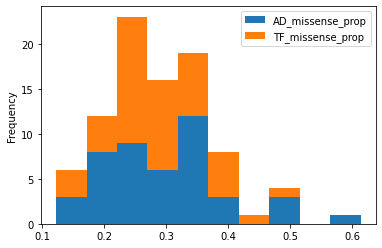

In [177]:
results[["AD_missense_prop", "TF_missense_prop"]].plot( kind='hist', stacked=True)

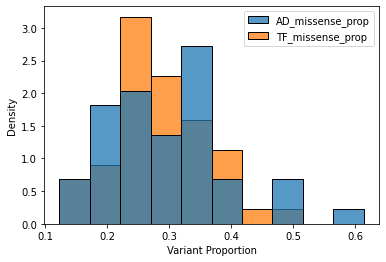

In [185]:
sns.histplot(results[["AD_missense_prop", "TF_missense_prop"]],
            stat = "density")
plt.xlabel("Variant Proportion");

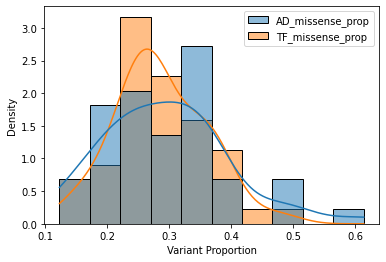

In [179]:
sns.histplot(results[["AD_missense_prop", "TF_missense_prop"]], 
             stat = "density", kde = True)
plt.xlabel("Variant Proportion");

---

In [180]:
# ADs vs non AD regions
fisher_exact_p_vals_v2 = []

for i in results.index:
    AD_var_nt = results["AD_missense"].iloc[i]
    AD_nt_len = results["AD_length"].iloc[i]
    
    TF_minus_AD_var_nt = results["TF_missense"].iloc[i] - AD_var_nt
    TF_minus_AD_nt_len = results["TF_length"].iloc[i] - AD_nt_len
    
    data = [[AD_var_nt, TF_minus_AD_var_nt],
           [AD_nt_len - AD_var_nt, TF_minus_AD_nt_len - TF_minus_AD_var_nt]]

    p_val = stats.fisher_exact(data)[1]
    fisher_exact_p_vals_v2.append(p_val)

In [181]:
results["fisher_exact_p_vals2"] = fisher_exact_p_vals_v2
results = results.sort_values(by = "fisher_exact_p_vals2")
results = results.reset_index(drop = True)
results = results.reset_index()
results

,level_0,index,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop,fisher_exact_p_vals,BH_crit_val,fisher_exact_p_vals2
0,0,0,486,P11308,183,136,86,0.279835,0.469945,0.000006,0.002222,1.012926e-12
1,1,1,490,P10827,52,107,26,0.218367,0.500000,0.000028,0.004444,2.935654e-06
2,2,3,1441,Q15788,409,423,98,0.293546,0.239609,0.034176,0.008889,4.739770e-03
3,3,2,3969,Q03164,140,887,20,0.223482,0.142857,0.022451,0.006667,1.757595e-02
4,4,7,414,P25490,96,74,25,0.178744,0.260417,0.084869,0.017778,2.228489e-02
5,5,5,598,P43354,105,165,20,0.275920,0.190476,0.071865,0.013333,3.087234e-02
6,6,6,619,Q9NQB0,100,165,18,0.266559,0.180000,0.082525,0.015556,3.555385e-02
7,7,4,562,Q96QS3,91,150,16,0.266904,0.175824,0.069580,0.011111,3.778596e-02
8,8,9,519,Q13422,82,149,31,0.287091,0.378049,0.118855,0.022222,6.184701e-02
9,9,8,391,Q02548,55,101,20,0.258312,0.363636,0.106966,0.020000,6.698236e-02


In [182]:
# Benjamini - Hochberg critical value
results["BH_crit_val"] = 0.1 * (results["index"] + 1) / len(results)
results

,level_0,index,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop,fisher_exact_p_vals,BH_crit_val,fisher_exact_p_vals2
0,0,0,486,P11308,183,136,86,0.279835,0.469945,0.000006,0.002222,1.012926e-12
1,1,1,490,P10827,52,107,26,0.218367,0.500000,0.000028,0.004444,2.935654e-06
2,2,3,1441,Q15788,409,423,98,0.293546,0.239609,0.034176,0.008889,4.739770e-03
3,3,2,3969,Q03164,140,887,20,0.223482,0.142857,0.022451,0.006667,1.757595e-02
4,4,7,414,P25490,96,74,25,0.178744,0.260417,0.084869,0.017778,2.228489e-02
5,5,5,598,P43354,105,165,20,0.275920,0.190476,0.071865,0.013333,3.087234e-02
6,6,6,619,Q9NQB0,100,165,18,0.266559,0.180000,0.082525,0.015556,3.555385e-02
7,7,4,562,Q96QS3,91,150,16,0.266904,0.175824,0.069580,0.011111,3.778596e-02
8,8,9,519,Q13422,82,149,31,0.287091,0.378049,0.118855,0.022222,6.184701e-02
9,9,8,391,Q02548,55,101,20,0.258312,0.363636,0.106966,0.020000,6.698236e-02


In [183]:
# Significant rows
signific_rows = results[results["fisher_exact_p_vals2"] < results["BH_crit_val"]]
signific_rows

,level_0,index,TF_length,uniprotID,AD_length,TF_missense,AD_missense,TF_missense_prop,AD_missense_prop,fisher_exact_p_vals,BH_crit_val,fisher_exact_p_vals2
0,0,0,486,P11308,183,136,86,0.279835,0.469945,0.000006,0.002222,1.012926e-12
1,1,1,490,P10827,52,107,26,0.218367,0.500000,0.000028,0.004444,2.935654e-06
2,2,3,1441,Q15788,409,423,98,0.293546,0.239609,0.034176,0.008889,4.739770e-03


In [184]:
SFARI_TFs[SFARI_TFs["uniprotID"].isin(signific_rows["uniprotID"])]

,Unnamed: 0.1,Unnamed: 0,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports,GeneName,ProteinSeq,uniprotID,ENST
29,29,31,9,ERG,"ERG, ETS transcription factor",ENSG00000157554,21,Genetic Association,2.0,0,NaN,1,sp|P11308|ERG_HUMAN,MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSS...,P11308,ENST00000398919.6
53,53,56,9,NCOA1,nuclear receptor coactivator 1,ENSG00000084676,2,Rare Single Gene Mutation,1.0,0,3.0,4,sp|Q15788|NCOA1_HUMAN,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,Q15788,ENST00000348332.8
100,100,104,9,THRA,thyroid hormone receptor alpha,ENSG00000126351,17,"Rare Single Gene Mutation, Functional",2.0,0,NaN,5,sp|P10827|THA_HUMAN,MEQKPSKVECGSDPEENSARSPDGKRKRKNGQCSLKTSMSGYIPSY...,P10827,ENST00000264637.8
